### MSFT Stock Price data Analisis

#### 1. Loading the data

In [ ]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

from src.ta_analysis import load_and_prepare_data, compute_indicators

df = load_and_prepare_data("../data/yfinance_data/MSFT_historical_data.csv")
print("Shape:", df.shape)
print(df.head())


Shape: (5020, 6)
        Date      Open      High       Low     Close     Volume
0 2004-08-19  2.490664  2.591785  2.390042  2.499133  897427216
1 2004-08-20  2.515820  2.716817  2.503118  2.697639  458857488
2 2004-08-23  2.758411  2.826406  2.716070  2.724787  366857939
3 2004-08-24  2.770615  2.779581  2.579581  2.611960  306396159
4 2004-08-25  2.614201  2.689918  2.587302  2.640104  184645512


- as we can see the data has shape of 5020 rows by 6 columns.
- it contains Data, opening price, Closing price, the highest and the lowest during the day and total volume

#### 2. Computing indicators

- the following function compute shows major stock price indicators and we are using TA-Lib, a powerful library to compute common technical indicators for stock price analysis.  

In [ ]:
df = compute_indicators(df)

#### 1. SMA – Simple Moving Average

#### What it is:
- SMA = average of the last N closing prices.

- Here, it's the average of the last 20 days (which is about a month of trading).

#### Parameters:
- df['Close']: the column of closing prices.

- timeperiod=20: means take the average of the last 20 closing prices.

#### Why 20?
- 20 days ≈ 1 month of trading (there are about 20 trading days in a month).

- It’s a standard value used by traders to spot short-term trends.

#### What we get:
- A smoothed line showing the average closing price.

- If price is above SMA → upward momentum.

- If price is below SMA → downward momentum.

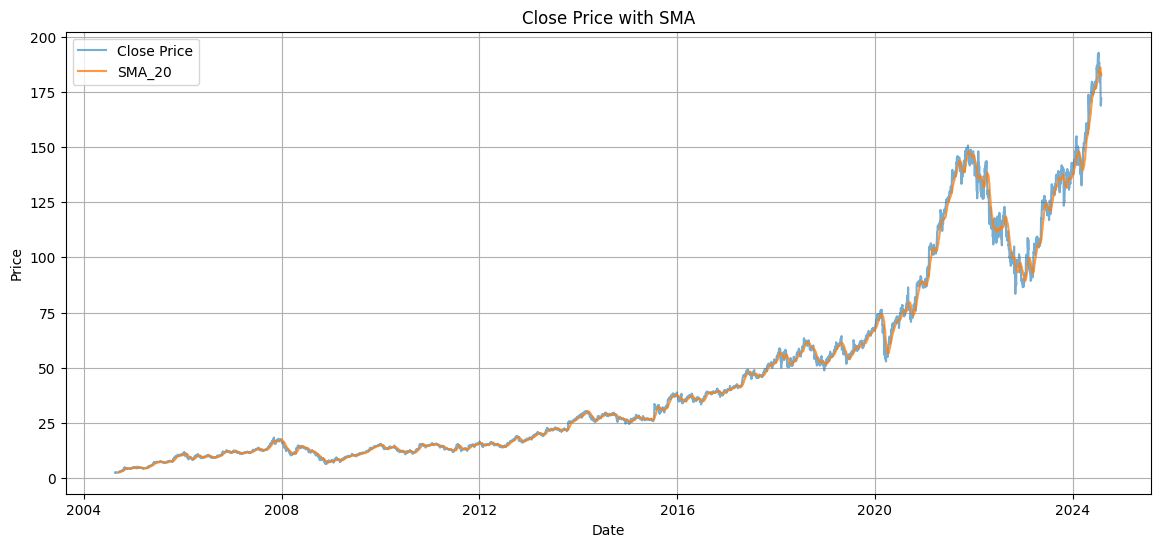

In [ ]:
from src.visualizations import plot_price_with_sma, plot_rsi, plot_macd

# Assume df already has indicators added using compute_indicators
plot_price_with_sma(df)        # Plots close price + SMA_20


### 2. RSI – Relative Strength Index
##### What it is:
- RSI measures momentum: how quickly prices are rising or falling.

- Outputs a number between 0 and 100.

#### Parameters:
- df['Close']: use the closing prices.

- timeperiod=14: check price changes over the past 14 days.

#### Why 14?
- It's a traditional default period. Good balance for detecting overbought/oversold levels.

#### What we get:
- RSI > 70 → Stock may be overbought (too high, might fall).

- RSI < 30 → Stock may be oversold (too low, might rise).

- Helps traders spot potential reversals.

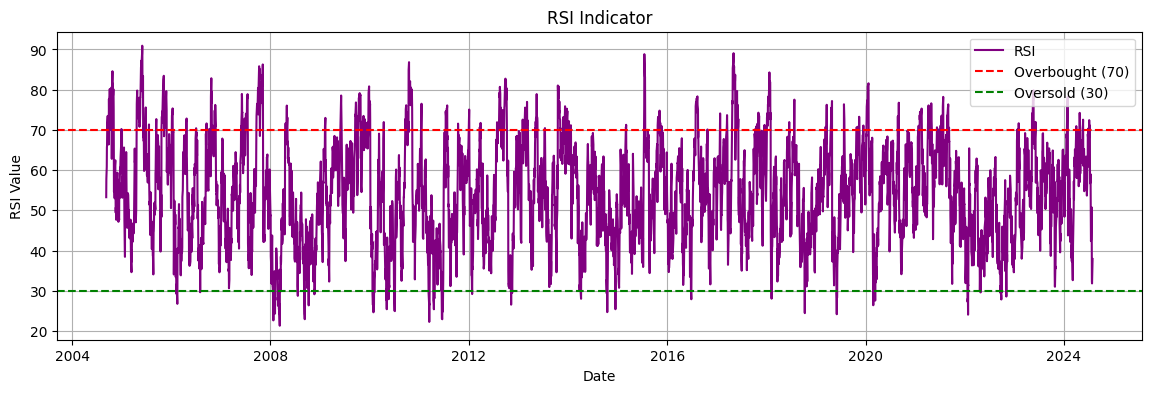

In [ ]:
plot_rsi(df)                   # Plots RSI line

 ### 3. MACD – Moving Average Convergence Divergence

#### What it is:
- MACD compares two moving averages to detect changes in trend strength.

#### Parameters:
- fastperiod=12: 12-day faster EMA (Exponential Moving Average).

- slowperiod=26: 26-day slower EMA.

- signalperiod=9: 9-day EMA of the MACD itself (used as the signal line).

#### Why these numbers?
- These are traditional values chosen by analysts.

- 12 and 26 come from older trading systems, found to be effective in many markets.

- 9 is used to smooth out MACD for clearer signals.

#### What we get:
- MACD: the difference between the 12-day and 26-day EMAs.

- MACD_signal: a 9-day average of the MACD line (used to trigger buy/sell).

- MACD_hist: difference between MACD and signal line (used for histograms).

#### How to read:
- When MACD > Signal Line → Buy signal (uptrend).

- When MACD < Signal Line → Sell signal (downtrend).

- Histogram shows how strong the trend is.

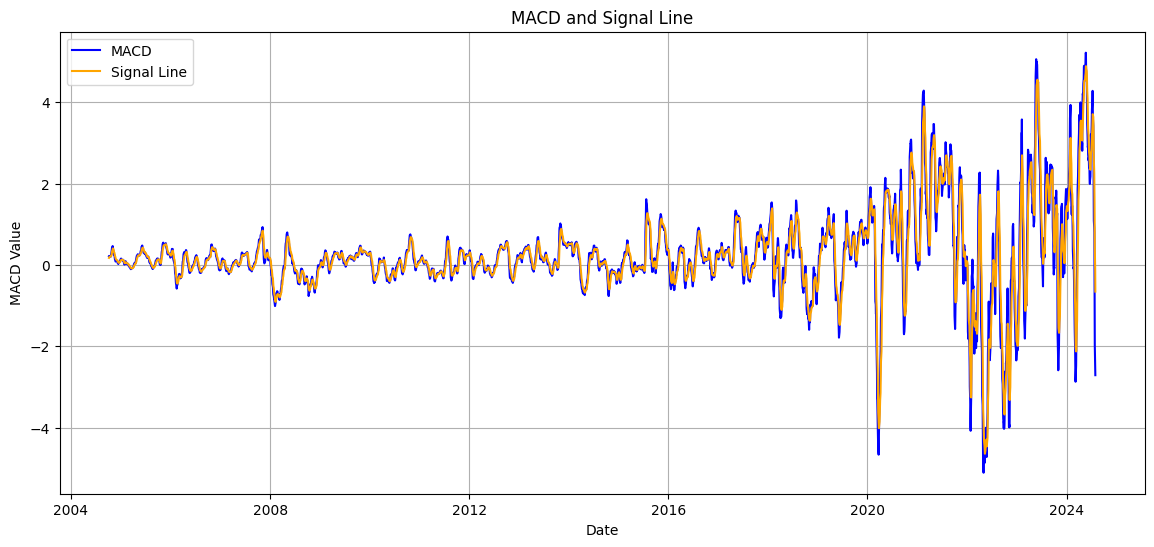

In [ ]:
plot_macd(df)                  # Plots MACD and Signal Line